<a href="https://colab.research.google.com/github/jesmine0820/Python/blob/main/DataScienceAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#read data into a DataFrame
df = pd.read_csv('/content/drive/My Drive/onlineRetail.csv') #read file using Google Colabs
#df = pd.read_csv('onlineRetail.csv') #read file using Jupyter

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


#Basic Data Understanding

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#Descriptive Statistics

In [ ]:
#Add column for TotalSales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df['TotalSales'].describe()

,TotalSales
count,541909.000000
mean,17.987795
std,378.810824
min,-168469.600000
25%,3.400000
50%,9.750000
75%,17.400000
max,168469.600000


In [ ]:
#Descriptive statistics for 'InvoiceNo'

#Get descriptive statistics for 'InvoiceNo'
invoiceNo_stats = df['InvoiceNo'].value_counts()

#Get unique number for InvoiceNo
num_Unique_InvoiceNo = df['InvoiceNo'].nunique()
total_Invoice = df['InvoiceNo'].count()

print('Mode of InvoiceNo: ', df['InvoiceNo'].mode()[0])
print('Number of unique InvoiceNo: ', num_Unique_InvoiceNo)
print('Total number of InvoiceNo: ', total_Invoice)

#Print frequency of each InvoiceNo
print(invoiceNo_stats)

Mode of InvoiceNo:  573585
Number of unique InvoiceNo:  25900
Total number of InvoiceNo:  541909
InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64


In [ ]:
#Descriptive statistics for 'StockCode'

#Get descriptive statistics for 'StockCode'
stockCode_stats = df['StockCode'].value_counts()

#Get unique number for StockCode
num_Unique_StockCode = df['StockCode'].nunique()
total_StockCode = df['StockCode'].count()

print('Mode of StockCode: ', df['StockCode'].mode()[0])
print('Number of unique StockCode: ', num_Unique_StockCode)
print('Total number of StockCode: ', total_StockCode)

#Print frequency of each StockCode
print(stockCode_stats)

Mode of StockCode:  85123A
Number of unique StockCode:  4070
Total number of StockCode:  541909
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64


In [ ]:
#Descriptive statistics for 'Description'

#Get descriptive statistics for 'Description'
description_stats = df['Description'].value_counts()

#Get unique number for Description
num_Unique_Description = df['Description'].nunique()
total_Invoice = df['Description'].count()

print('Mode of Description: ', df['Description'].mode()[0])
print('Number of unique Description: ', num_Unique_Description)
print('Total number of Description: ', total_Invoice)

#Print frequency of each Description
print(description_stats)

Mode of Description:  WHITE HANGING HEART T-LIGHT HOLDER
Number of unique Description:  4223
Total number of Description:  540455
Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64


In [ ]:
#Descriptive statistics for 'CustomerID'

#Get descriptive statistics for 'CustomerID'
customerID_stats = df['CustomerID'].value_counts()

#Get unique number for CustomerID
num_Unique_CustomerID = df['CustomerID'].nunique()
total_Invoice = df['CustomerID'].count()

print('Mode of CustomerID: ', df['CustomerID'].mode()[0])
print('Number of unique CustomerID: ', num_Unique_CustomerID)
print('Total number of CustomerID: ', total_Invoice)

#Print frequency of each CustomerID
print(customerID_stats)

Mode of CustomerID:  17841.0
Number of unique CustomerID:  4372
Total number of CustomerID:  406829
CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: count, Length: 4372, dtype: int64


In [ ]:
#Descriptive statistics for 'Country'

#Get descriptive statistics for 'Country'
country_stats = df['Country'].value_counts()

#Get unique number for Country
num_Unique_Country = df['Country'].nunique()
total_Country = df['Country'].count()

print('Mode of Country: ', df['Country'].mode()[0])
print('Number of unique Country: ', num_Unique_Country)
print('Total number of Country: ', total_Invoice)

#Print frequency of each Country
print(country_stats)

Mode of Country:  United Kingdom
Number of unique Country:  38
Total number of Country:  406829
Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      1

#HeatMap of Correlation Matrix for all Variables

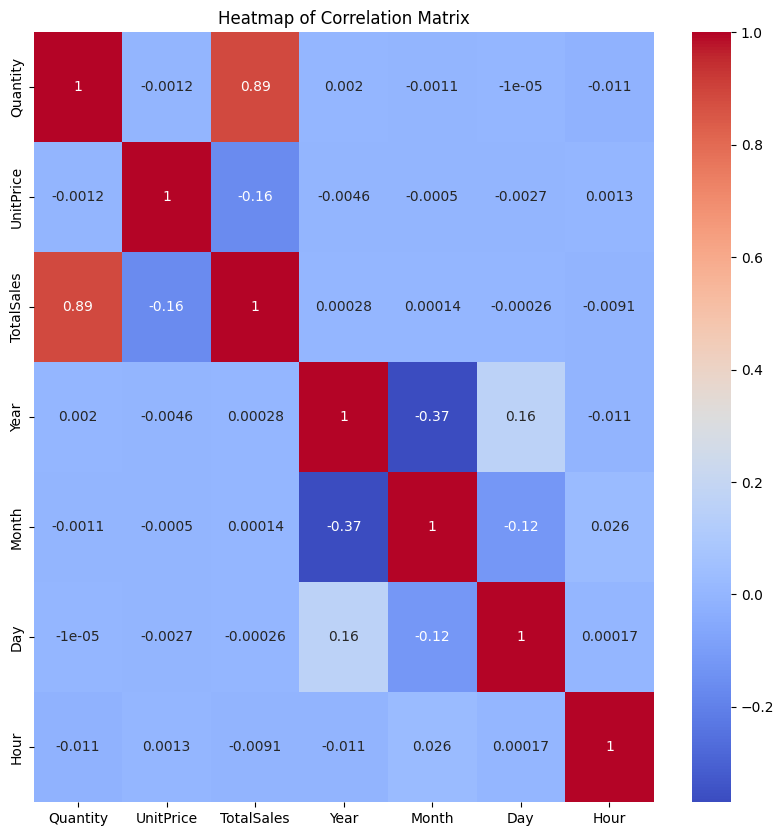

In [ ]:
#Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

#Separate the date in several format
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

#Compute correlations
correlation_Matrix = df[['Quantity', 'UnitPrice', 'TotalSales', 'Year', 'Month', 'Day', 'Hour']].corr()

#Plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_Matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

#InvoiceNo

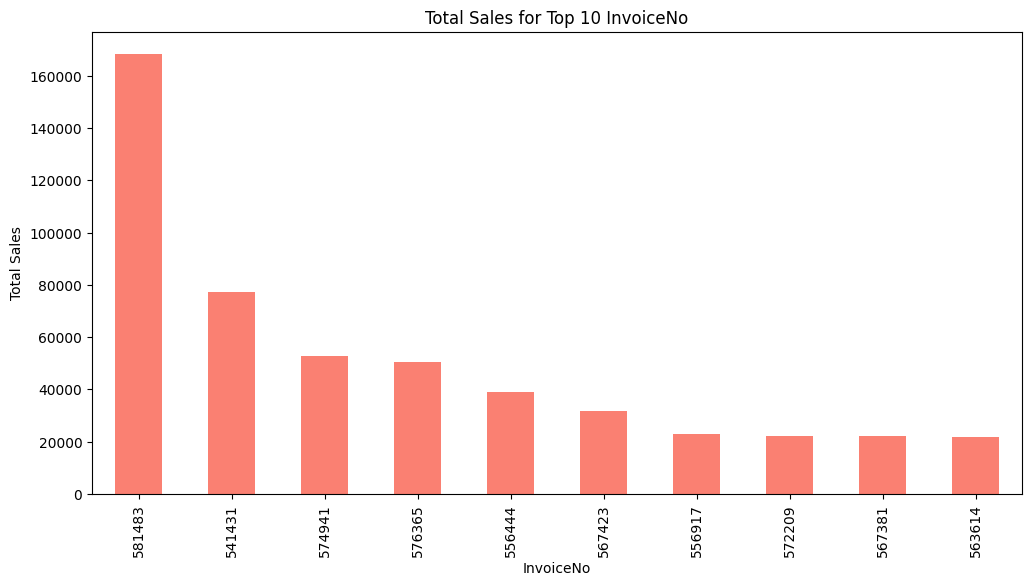

In [ ]:
# Aggregate by 'InvoiceNo'
invoiceNo_Sales = df.groupby('InvoiceNo')['TotalSales'].sum()

#Show top 10 InvoiceNo
plt.figure(figsize=(12, 6))
invoiceNo_Sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales for Top 10 InvoiceNo')
plt.xlabel('InvoiceNo')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

#StockCode

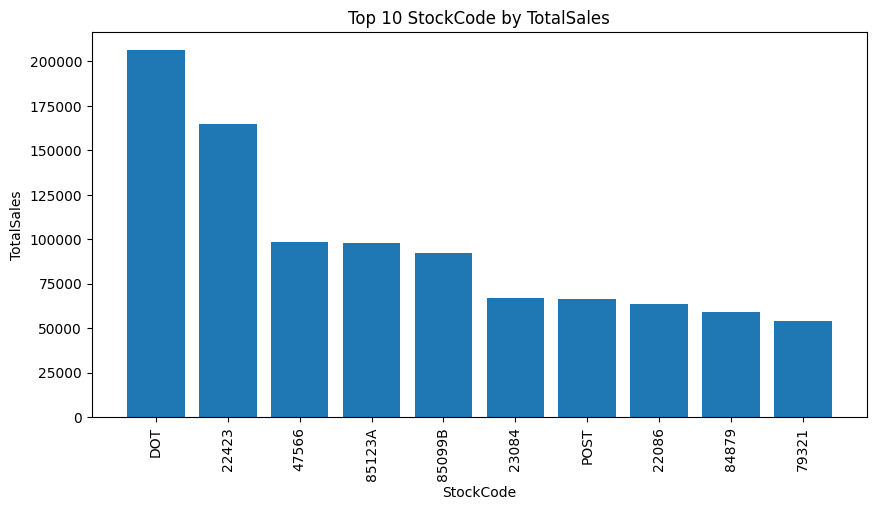

In [ ]:
#Aggregate StockCode and sort by total sales
top_n = 10
top_StockCode = df.groupby('StockCode')['TotalSales'].sum().sort_values(ascending=False).head(top_n)

#Plot the top N StockCode
plt.figure(figsize=(10, 5))
plt.bar(top_StockCode.index, top_StockCode.values)
plt.xlabel('StockCode')
plt.ylabel('TotalSales')
plt.title(f'Top {top_n} StockCode by TotalSales')
plt.xticks(rotation=90)
plt.show()


#Description

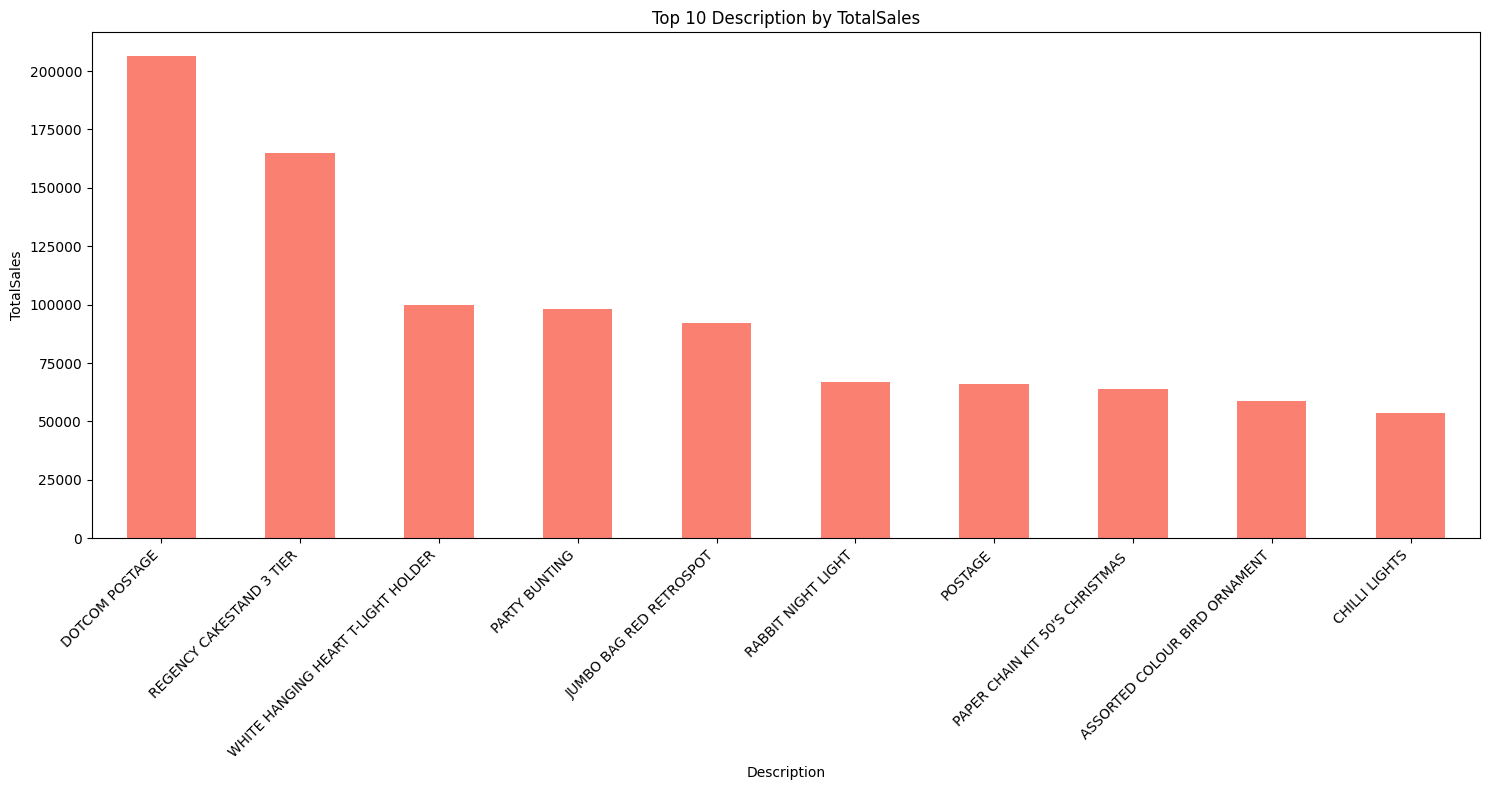

In [ ]:
#Aggregate Description and sort by total sales
top_n = 10
top_Description = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(top_n)

#Plot the top N Description
plt.figure(figsize=(15,8))
top_Description.plot(kind='bar', color='salmon')
plt.xlabel('Description')
plt.ylabel('TotalSales')
plt.title(f'Top {top_n} Description by TotalSales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#InvoiceDate

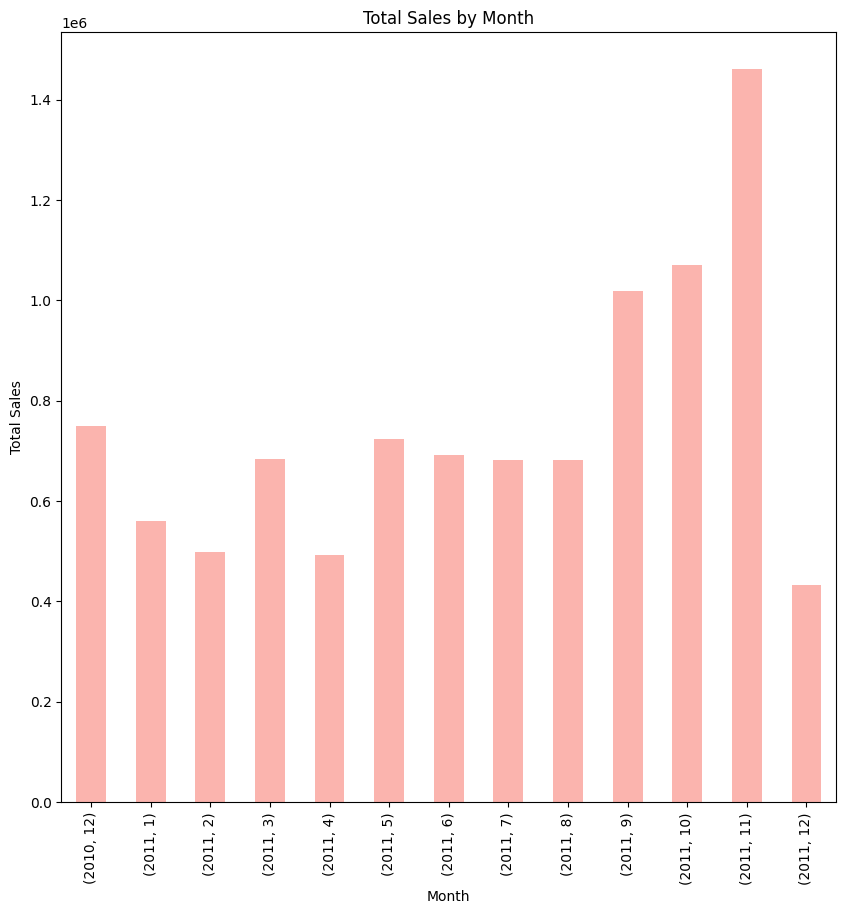

In [ ]:
#Aggregate data by month and year for trend analysis
monthly_Sales = df.groupby(['Year', 'Month'])['TotalSales'].sum()

#Plot barchart
plt.figure(figsize=(10,10))
monthly_Sales.plot(kind='bar', colormap='Pastel1')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#CustomerID

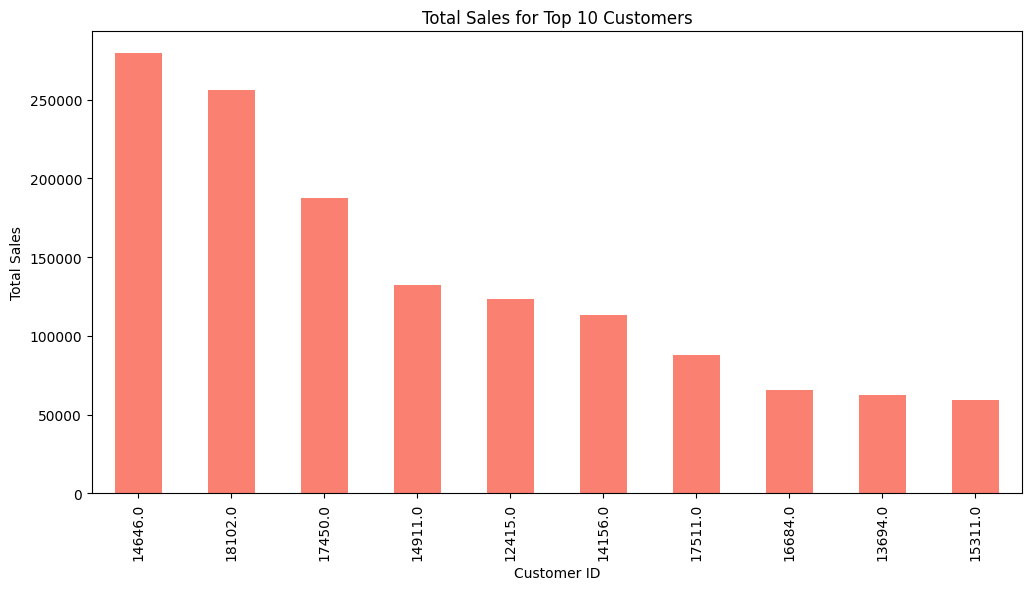

In [ ]:
# Aggregate by 'CustomerID'
customer_Sales = df.groupby('CustomerID')['TotalSales'].sum()

# Show top 10 customers
plt.figure(figsize=(12, 6))
customer_Sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales for Top 10 Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


#Country

<ipython-input-347-df7cae399caa>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['United Kingdom', 'Other Countries'], y=[uk_Sales, other_Sales], palette='coolwarm_r')


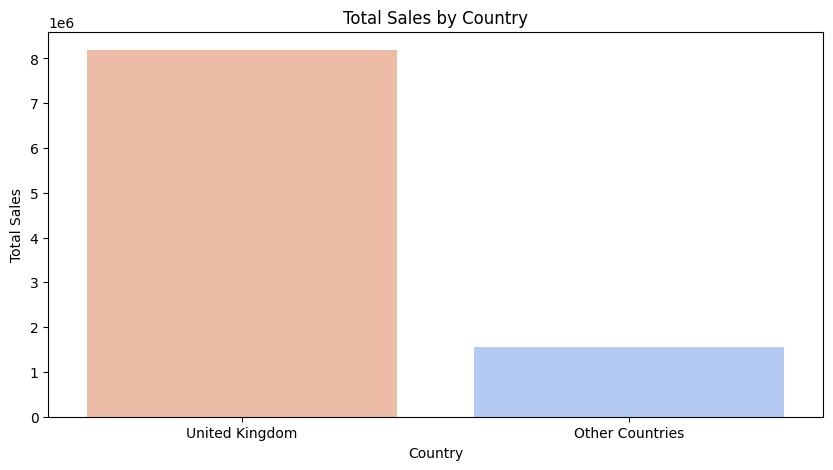

In [ ]:
#Aggregate TotalSales by Country
country_Sales = df.groupby('Country')['TotalSales'].sum()

#Explore UK sales and other countries
uk_Sales = country_Sales['United Kingdom']
other_Sales = country_Sales.drop('United Kingdom').sum()

#Plot barchart
plt.figure(figsize=(10, 5))
sns.barplot(x=['United Kingdom', 'Other Countries'], y=[uk_Sales, other_Sales], palette='coolwarm_r')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

#Canceled InvoiceNo and Non-canceled InvoiceNo

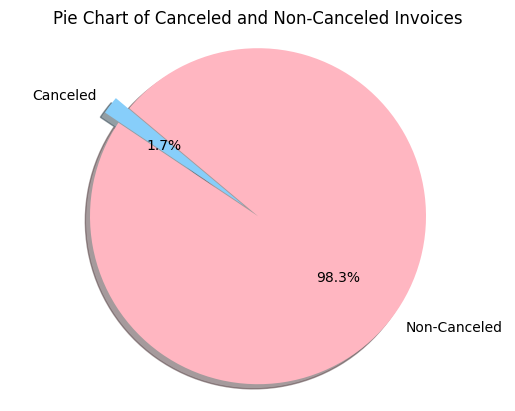

In [ ]:
#Add column for canceled invoice
df['Canceled'] = df['InvoiceNo'].str.startswith('C')

#Calculate the number of canceled and non-canceled invoices
canceled_Invoice_Count = df['Canceled'].sum()
non_Canceled_Invoice_Count = (~df['Canceled']).sum()

#Plot pie chart
labels = ['Canceled', 'Non-Canceled']
sizes = [canceled_Invoice_Count, non_Canceled_Invoice_Count]
colors = ['lightskyblue', 'lightpink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Canceled and Non-Canceled Invoices')
plt.show()

#Distribution of InvoiceDate

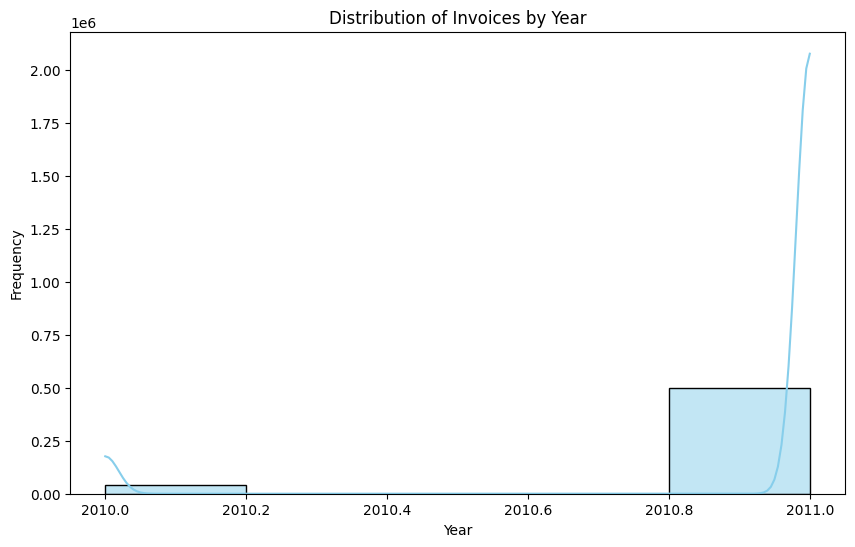

In [ ]:
# Plot distribution of Year
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

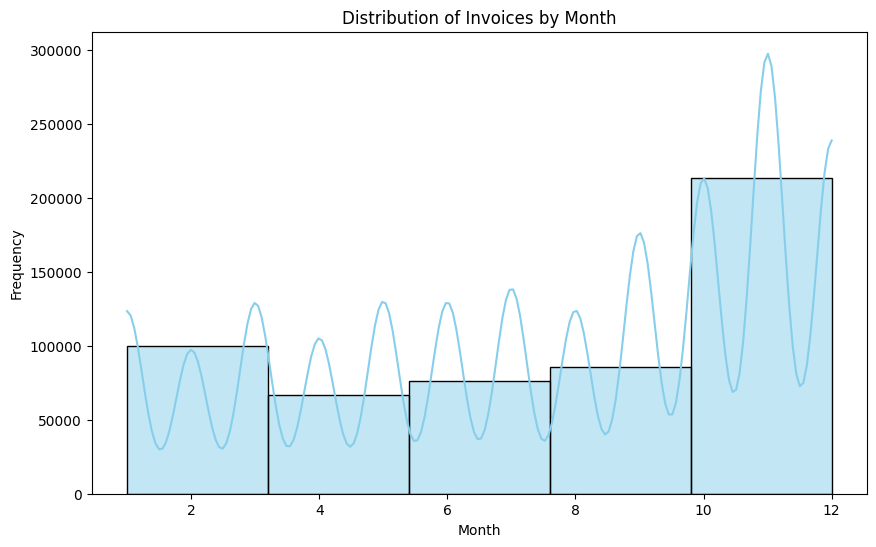

In [ ]:
# Plot distribution of Month
plt.figure(figsize=(10, 6))
sns.histplot(df['Month'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

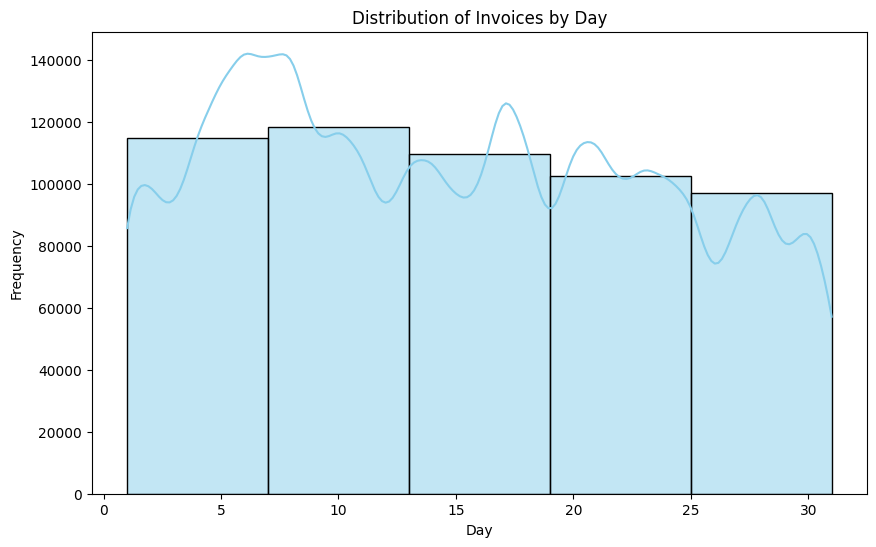

In [ ]:
# Plot distribution of Day
plt.figure(figsize=(10, 6))
sns.histplot(df['Day'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

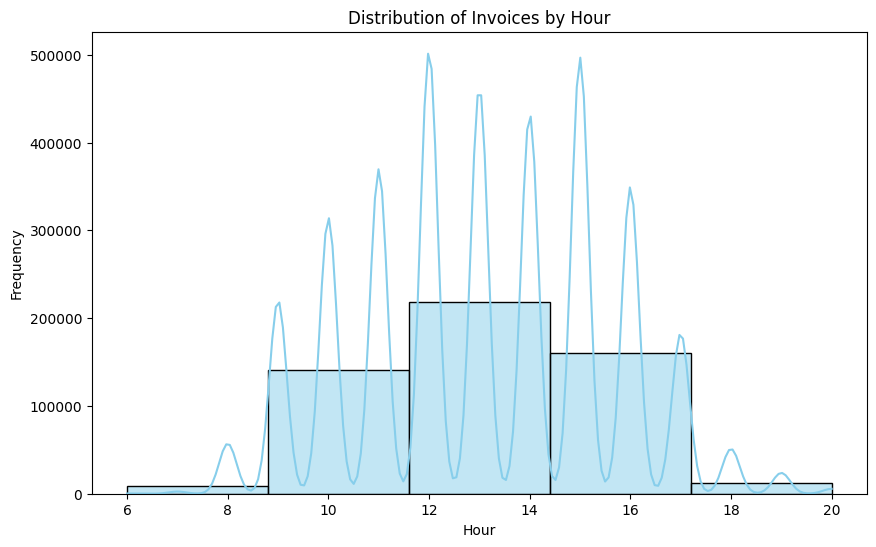

In [ ]:
# Plot distribution of Hour
plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.show()

#Distribution of CustomerID

<ipython-input-353-b72f0ce62b26>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerID', data=df, order=df['CustomerID'].value_counts().index, palette='coolwarm')


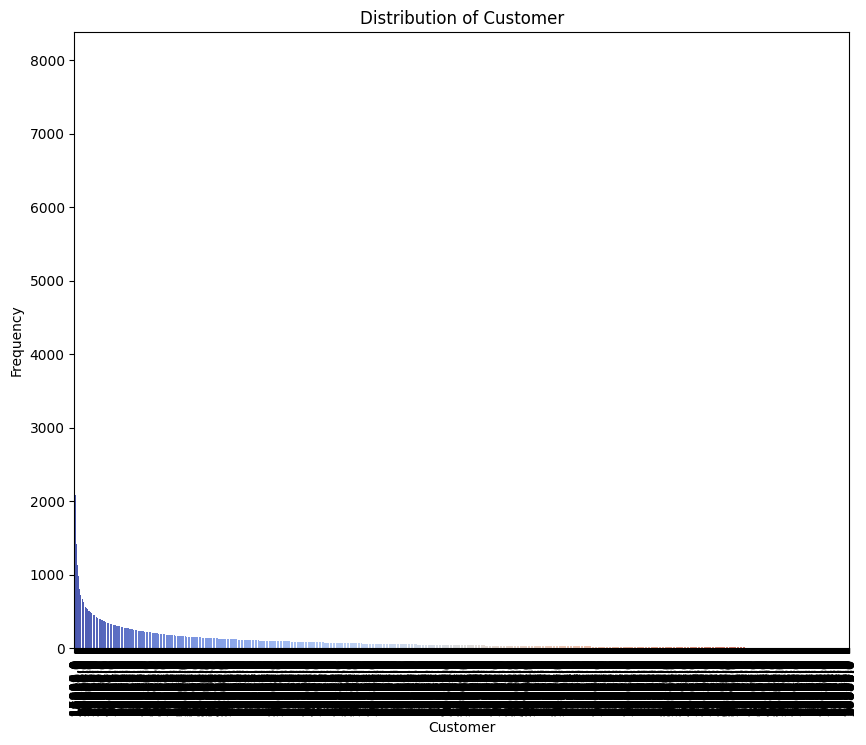

In [ ]:
#Distribution for Customer
plt.figure(figsize=(10, 8))
sns.countplot(x='CustomerID', data=df, order=df['CustomerID'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Customer')
plt.xlabel('Customer')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

#Distribution of Country

<ipython-input-354-d590c0ff08f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='coolwarm')


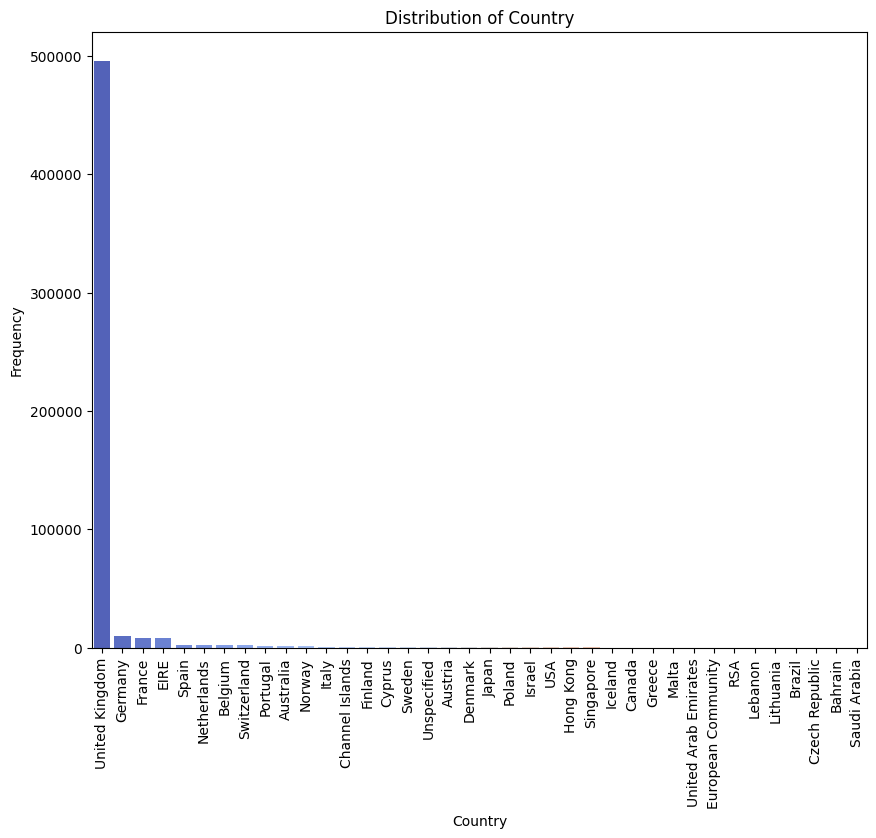

In [ ]:
#Distribution for Country
plt.figure(figsize=(10, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Country'].describe()

,Country
count,541909
unique,38
top,United Kingdom
freq,495478


#Distribution of TotalSales

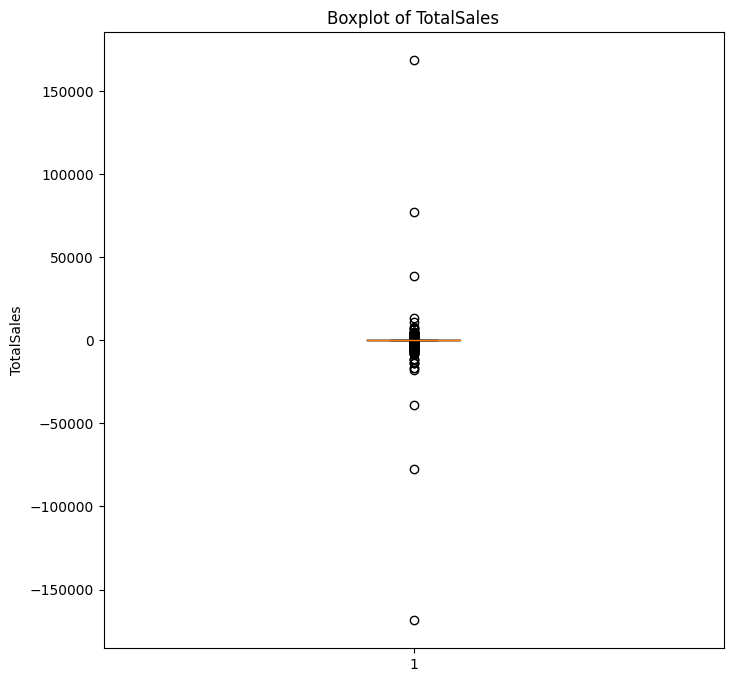

In [ ]:
plt.figure(figsize=(8,8))
plt.boxplot(df['TotalSales'])
plt.title('Boxplot of TotalSales')
plt.ylabel('TotalSales')
plt.show()

In [ ]:
df['TotalSales'].describe()

,TotalSales
count,541909.000000
mean,17.987795
std,378.810824
min,-168469.600000
25%,3.400000
50%,9.750000
75%,17.400000
max,168469.600000


#Null Data Detection

In [ ]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0
TotalSales,0
Year,0


In [ ]:
#Total missing values in dataset.
total_Cells = np.product(df.shape)
total_Missing_Values = df.isnull().sum().sum()

#Percentage of missing values and non-missing data
percentage_Missing_Values = (total_Missing_Values / total_Cells) * 100
percentage_Non_Missing_Values = 100 - percentage_Missing_Values

print('Percentage of missing values: {:.2f}%'.format(percentage_Missing_Values))

Percentage of missing values: 1.80%


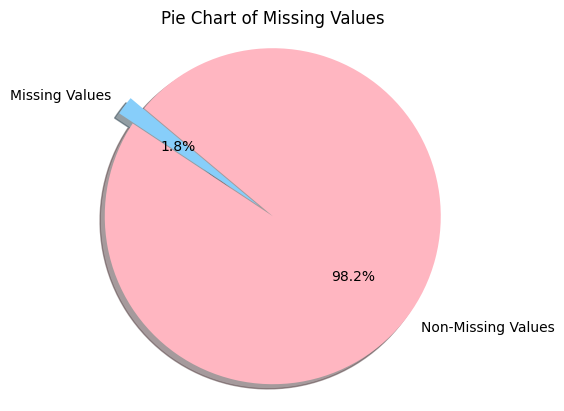

In [ ]:
#Plot pie chart
labels = ['Missing Values', 'Non-Missing Values']
sizes = [total_Missing_Values, total_Cells - total_Missing_Values]
colors = ['lightskyblue', 'lightpink']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Missing Values')
plt.show()


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalSales   541909 non-null  float64       
 9   Year         541909 non-null  int32         
 10  Month        541909 non-null  int32         
 11  Day          541909 non-null  int32         
 12  Hour         541909 non-null  int32         
 13  Canceled     541909 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int32(4), int64(1), object(4)
memory usag

(541909, 14)

#Duplicate Data Detection

In [ ]:
#Find the duplicate rows
duplicate_rows = df[df.duplicated()]
print('Number of duplicate rows: ', duplicate_rows.shape)

Number of duplicate rows:  (5268, 14)


#Outlier Detection

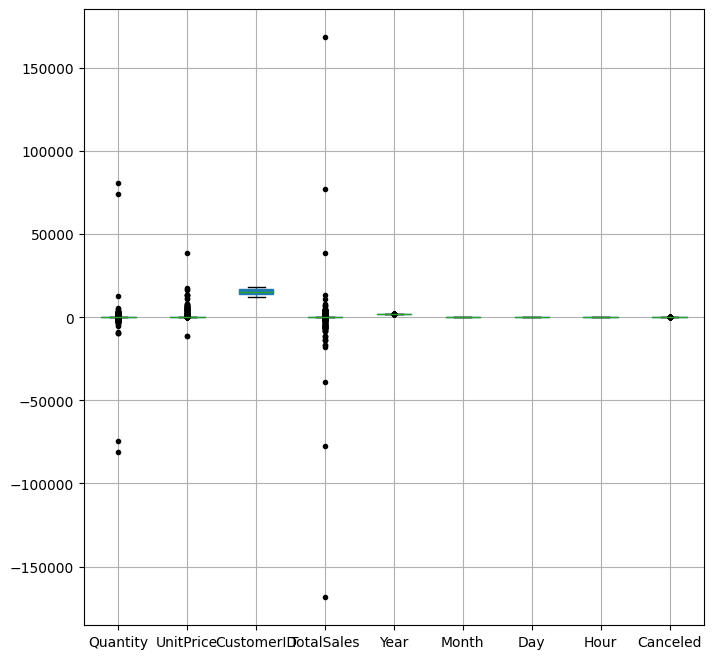

In [ ]:
#Outlier of overall variable
plt.figure(figsize=(8,8))
df.boxplot(patch_artist=True, sym='k.')
plt.show()

#Zero Values Detection

In [ ]:
#Find the zero value for each of the variable
zero_Quantity = (df['Quantity'] == 0).sum()
zero_UnitPrice = (df['UnitPrice'] == 0).sum()
zero_TotalSales = (df['TotalSales'] == 0).sum()

print('Number of zero values in Quantity: ', zero_Quantity)
print('Number of zero values in UnitPrice: ', zero_UnitPrice)
print('Number of zero values in TotalSales: ', zero_TotalSales)

Number of zero values in Quantity:  0
Number of zero values in UnitPrice:  2515
Number of zero values in TotalSales:  2515


#Data Cleaning

In [ ]:
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
TotalSales,float64
Year,int32


In [ ]:
import hashlib

#Change value from bool to int
df['Canceled'] = df['Canceled'].replace(1, 'True')
df['Canceled'] = df['Canceled'].replace(0, 'False')

#Drop InvoiceDate as we have separate variable for date and time already
df = df.drop(['InvoiceDate'], axis=1)

# Define a simple hash function using SHA-256
def hash_value(value):
    # Handle potential float values by converting to string first
    if isinstance(value, float):
        value = str(value)
    return int(hashlib.sha256(value.encode()).hexdigest(), 16) % (10 ** 8)

# Apply the hash function to the columns
df['InvoiceNo_Hashed'] = df['InvoiceNo'].apply(hash_value)
df['StockCode_Hashed'] = df['StockCode'].apply(hash_value)
df['Description_Hashed'] = df['Description'].apply(hash_value) # This line caused the error

df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
UnitPrice,float64
CustomerID,float64
Country,object
TotalSales,float64
Year,int32
Month,int32


In [ ]:
#Drop rows with any missing values
df = df.dropna()

In [ ]:
#Drop the outlier rows
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df = df[df['TotalSales'] > 0]

In [ ]:
#Drop zero values
df = df[df['CustomerID'] != 0]

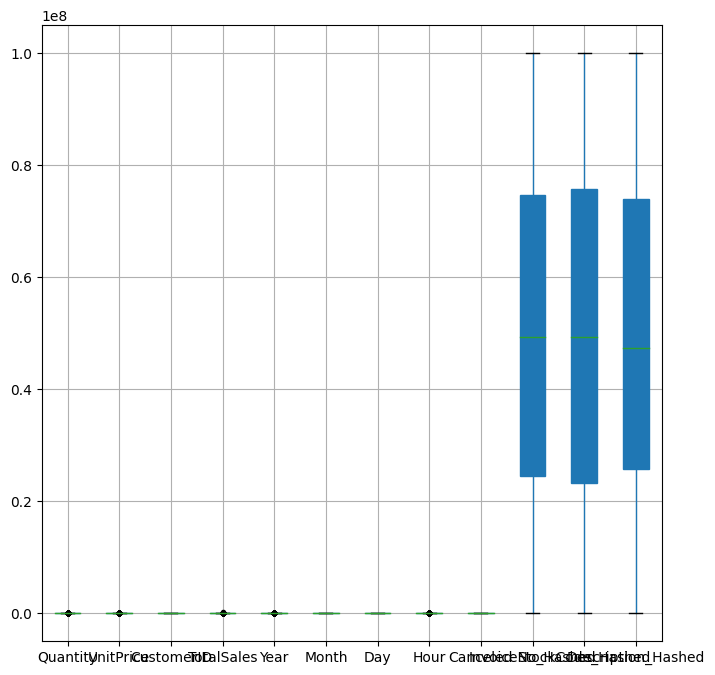

In [ ]:
#Check the overall variable
plt.figure(figsize=(8,8))
df.boxplot(patch_artist=True, sym='k.')
plt.show()

In [ ]:
from scipy import stats

#Print Z-Score
z_Score = np.abs(stats.zscore(df[['Quantity', 'UnitPrice', 'TotalSales']]))
print(z_Score)

        Quantity  UnitPrice  TotalSales
0       0.038968   0.025635    0.022962
1       0.038968   0.012377    0.006655
2       0.027816   0.016585    0.001284
3       0.038968   0.012377    0.006655
4       0.038968   0.012377    0.006655
...          ...        ...         ...
541904  0.005511   0.102566    0.039463
541905  0.038968   0.045999    0.031698
541906  0.050121   0.046770    0.018756
541907  0.050121   0.046770    0.018756
541908  0.055697   0.082972    0.024418

[397884 rows x 3 columns]


In [ ]:
#Print the Z-Score > 3
threshold = 3
outlier_indices = np.where(z_Score > threshold)
print(outlier_indices)

(array([   237,    720,    860,   1797,   2609,   2734,   3277,   3606,
         3606,   3670,   3671,   3671,   3714,   4206,   4436,   7354,
         7810,   8021,   9734,  10783,  10785,  10785,  10786,  10786,
        10787,  10793,  10793,  10794,  10794,  10796,  10796,  10798,
        10798,  10799,  12320,  12580,  12581,  12991,  12991,  13100,
        13606,  14707,  15781,  16514,  18465,  18501,  19576,  20608,
        20711,  20712,  20947,  21285,  21286,  21530,  21713,  21713,
        21761,  22442,  23261,  23652,  24631,  24636,  24697,  25305,
        25336,  25348,  27145,  27145,  27335,  27708,  28034,  28076,
        28081,  28821,  29263,  31991,  32027,  32181,  32181,  32182,
        32182,  32183,  32183,  32184,  32184,  32306,  32359,  32450,
        32451,  32454,  32725,  32725,  32726,  32726,  32727,  32727,
        32787,  32787,  32788,  32788,  33344,  33357,  33609,  34022,
        34323,  35320,  35325,  35326,  35599,  36416,  37050,  37120,
     

In [ ]:
#Remove the outliers that Z-Score > 3
df = df[(z_Score < threshold).all(axis=1)]

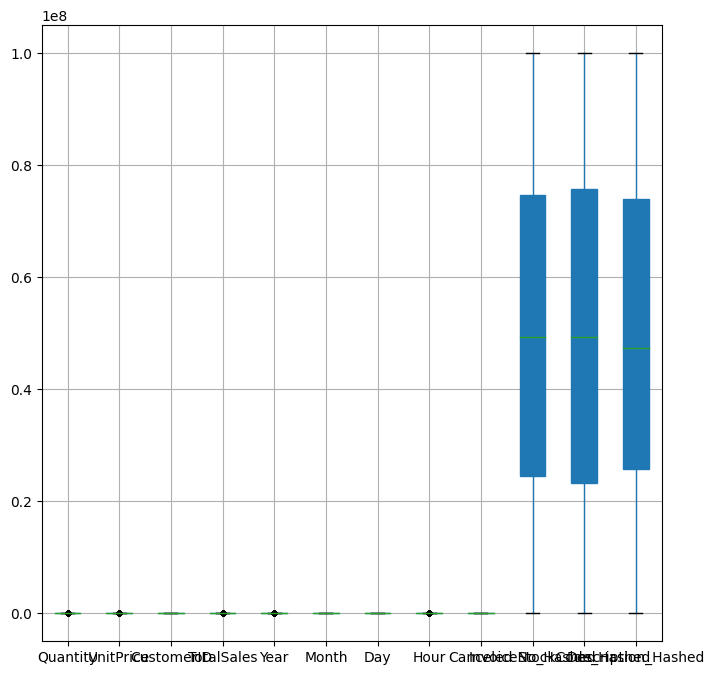

In [ ]:
#Detect outliers after removing
plt.figure(figsize=(8,8))
df.boxplot(patch_artist=True, sym='k.')
plt.show()

In [ ]:
df.shape

(397082, 16)

#Data Construction

In [ ]:
#Move all the categorical feature data into a table
x_categorical = df[['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']]

#Move all the continuous feature data into a table
x_continuous = df.drop(['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country', 'Year', 'Month', 'Day', 'InvoiceDate', 'Hour', 'Canceled'], axis=1)

#Retrieve the 'target' value for prediction
y_target = df.TotalSales.values

KeyError: "['InvoiceDate'] not found in axis"

#Data Normalisation

In [ ]:
#Normalization on the continuous feature data
print(np.min(x_continuous))
print(np.max(x_continuous))
x_continuous.dtypes
#x_continuous_normalized = (x_continuous - x_continuous.min()) / (x_continuous.max() - x_continuous.min())

In [ ]:
#Print the normalized result
print(x_continuous_normalized.head())

#Data Concatenation

In [ ]:
#Combine the normalised data back to the original Dataframe
df['Quantity'] = x_continuous_normalized['Quantity']
df['UnitPrice'] = x_continuous_normalized['UnitPrice']
df['TotalSales'] = x_continuous_normalized['TotalSales']

df.head()

#Train Test Split

In [ ]:
#Retrieve the value for train_test_split
y = df.TotalSales.values
x_Data = df.drop(['TotalSales'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_Data, y, test_size = 0.2, random_state=0)

#Mean Absolute Percentage Error (MAPE)

#R_Squared

#Root Mean Square Error

#Mean Absolute Error